# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


## Grading = 10 Points

In [ ]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

Datasets downloaded successfully!


### Import Neccesary Packages

In [ ]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [ ]:
# YOUR CODE HERE

Tess_data = glob.glob("/content/Tess/*/*.wav")
Ravdess_data = glob.glob("/content/ravdess/*/*.wav")
len(Tess_data),len(Ravdess_data)


(2679, 1168)

In [ ]:
#print(Tess_data[0].split("_")[3].split(".")[0])

angry


#### Play the sample audio

In [ ]:
ipd.Audio(Ravdess_data[0])

In [ ]:
# YOUR CODE HERE
ipd.Audio(Tess_data[0])

### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

In [ ]:
from pandas.tseries.offsets import Tick
# YOUR CODE HERE

import plotly.express as px

#Ravdess_data
emotions_Tess = []
mapping_Tess = {'neutral': 'Neutral', 'calm': 'Calm', 'happy': 'Happy', 'sad': 'Sad', 'angry': 'Angry', 'fear': 'Fearful', 'disgust': 'Disgust','surprised': 'Surprised'}

for file_name in Tess_data:
    emotions_Tess.append(mapping_Tess[file_name.split('_')[3].split(".")[0]])

from collections import Counter

total_Tess=Counter(emotions_Tess)

emotion_counter = Counter(emotions_Tess)

# Convert Counter to a pandas DataFrame
dfTess_emotions = pd.DataFrame(list(emotion_counter.items()), columns=["Emotion", "Count"])

# Create a histogram using Plotly
fig = px.bar(dfTess_emotions, x="Emotion", y="Count", color="Emotion",
             labels={"Emotion": "Emotion Labels", "Count": "Frequency"},
             title="Distribution of Emotion Counts (Tess)")

# # Annotate each bar with emotion label
# for index, row in df_emotions.iterrows():
#     fig.add_annotation(x=row["Emotion"], y=row["Count"],
#                        text=row["Emotion"], showarrow=False, font=dict(size=10))

# Show the plot
fig.show()

In [ ]:
from pandas.tseries.offsets import Tick
# YOUR CODE HERE

import plotly.express as px

#Ravdess_data
emotions_Ravdess = []
mapping_Ravdess = {'01': 'Neutral', '02': 'Calm', '03': 'Happy', '04': 'Sad', '05': 'Angry', '06': 'Fearful', '07': 'Disgust','08': 'Surprised'}

for file_name in Ravdess_data:
    emotions_Ravdess.append(mapping_Ravdess[file_name.split('-')[2]])

from collections import Counter
total_Ravdess=Counter(emotions_Ravdess)

emotion_counter = Counter(emotions_Ravdess)

# Convert Counter to a pandas DataFrame
df_emotions = pd.DataFrame(list(emotion_counter.items()), columns=["Emotion", "Count"])

# Create a histogram using Plotly
fig = px.bar(df_emotions, x="Emotion", y="Count", color="Emotion",
             labels={"Emotion": "Emotion Labels", "Count": "Frequency"},
             title="Distribution of Emotion Counts (RAVDESS)")

# for i in range(len(df_emotions)):
#     plt.annotate(s = df_emotions['Count'][i], xy = (i,df_emotions['Count'][i]/2 ))
# plt.show()

# # Annotate each bar with emotion label
# for index, row in df_emotions.iterrows():
#     fig.add_annotation(x=row["Emotion"], y=row["Count"],
#                        text=row["Emotion"], showarrow=False, font=dict(size=10))

# Show the plot
fig.show()

In [ ]:
print(df_emotions['Count'][0])

182


#### Visualize sample audio signal using librosa

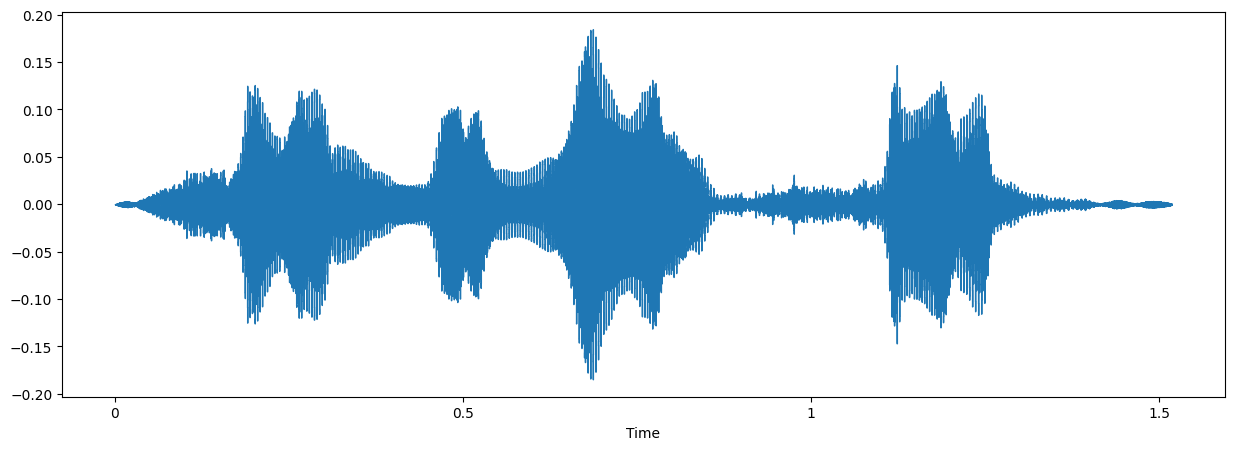

In [ ]:
# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(Tess_data[0])
plt.figure(figsize=(15, 5))
# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

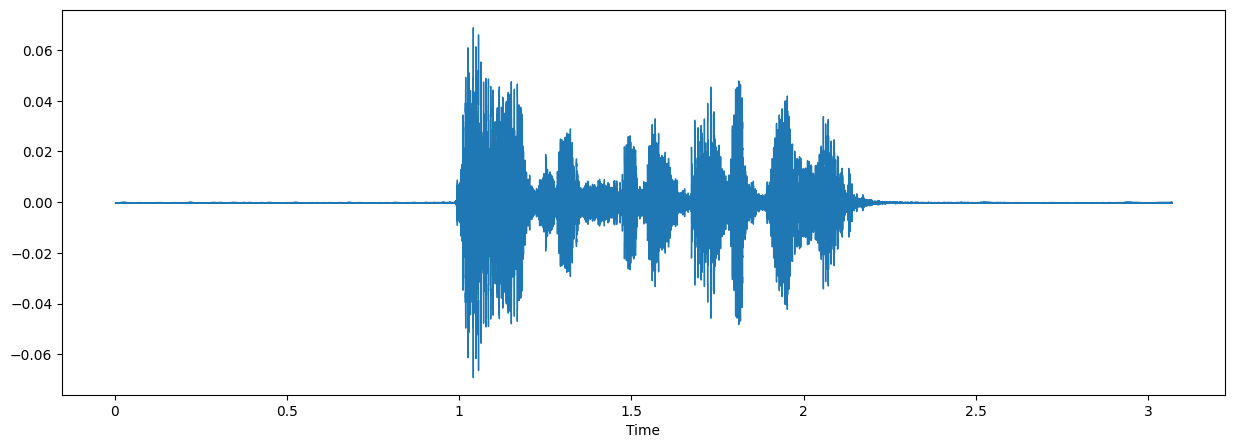

In [ ]:
data, sampling_rate = librosa.load(Ravdess_data[0])
plt.figure(figsize=(15, 5))
# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [ ]:
 # YOUR CODE HERE
Ravdess='/content/ravdess/'
ravdess_directory_list = os.listdir('/content/ravdess/')

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('_')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append((part[1]))
        file_path.append(Ravdess + dir + '/' + file)


In [ ]:
 # YOUR CODE HERE
Tess='/content/Tess/'
tess_directory_list = os.listdir('/content/Tess')

file_emotion1 = []
file_path1 = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion1.append('surprise')
        else:
          emotion = part
          file_emotion1.append(part)
        file_path1.append(Tess + dir + '/' + file)

In [ ]:
#print(file_path)

['/content/ravdess/Actor_05/03-01-08-01-02-01-05_surprised.wav', '/content/ravdess/Actor_05/03-01-06-02-01-01-05_fear.wav', '/content/ravdess/Actor_05/03-01-04-02-02-01-05_sad.wav', '/content/ravdess/Actor_05/03-01-04-02-01-02-05_sad.wav', '/content/ravdess/Actor_05/03-01-03-02-01-01-05_happy.wav', '/content/ravdess/Actor_05/03-01-03-02-02-02-05_happy.wav', '/content/ravdess/Actor_05/03-01-05-02-01-02-05_angry.wav', '/content/ravdess/Actor_05/03-01-08-02-01-01-05_surprised.wav', '/content/ravdess/Actor_05/03-01-07-02-02-01-05_disgust.wav', '/content/ravdess/Actor_05/03-01-08-01-02-02-05_surprised.wav', '/content/ravdess/Actor_05/03-01-05-01-01-02-05_angry.wav', '/content/ravdess/Actor_05/03-01-05-01-02-01-05_angry.wav', '/content/ravdess/Actor_05/03-01-08-01-01-01-05_surprised.wav', '/content/ravdess/Actor_05/03-01-06-01-01-02-05_fear.wav', '/content/ravdess/Actor_05/03-01-06-02-02-02-05_fear.wav', '/content/ravdess/Actor_05/03-01-04-01-02-02-05_sad.wav', '/content/ravdess/Actor_05/03-

In [ ]:
#print(file_path1)

['/content/Tess/OAF_angry/OAF_south_angry.wav', '/content/Tess/OAF_angry/OAF_burn_angry.wav', '/content/Tess/OAF_angry/OAF_raid_angry.wav', '/content/Tess/OAF_angry/OAF_kill_angry.wav', '/content/Tess/OAF_angry/OAF_walk_angry.wav', '/content/Tess/OAF_angry/OAF_choice_angry.wav', '/content/Tess/OAF_angry/OAF_tip_angry.wav', '/content/Tess/OAF_angry/OAF_mob_angry.wav', '/content/Tess/OAF_angry/OAF_wash_angry.wav', '/content/Tess/OAF_angry/OAF_hire_angry.wav', '/content/Tess/OAF_angry/OAF_gaze_angry.wav', '/content/Tess/OAF_angry/OAF_near_angry.wav', '/content/Tess/OAF_angry/OAF_gun_angry.wav', '/content/Tess/OAF_angry/OAF_limb_angry.wav', '/content/Tess/OAF_angry/OAF_witch_angry.wav', '/content/Tess/OAF_angry/OAF_voice_angry.wav', '/content/Tess/OAF_angry/OAF_life_angry.wav', '/content/Tess/OAF_angry/OAF_lean_angry.wav', '/content/Tess/OAF_angry/OAF_phone_angry.wav', '/content/Tess/OAF_angry/OAF_void_angry.wav', '/content/Tess/OAF_angry/OAF_lose_angry.wav', '/content/Tess/OAF_angry/OAF_n

#### Create a dictionary or a function to encode the emotions

In [ ]:
# YOUR CODE HERE
def encode_emotion(emotion):
  emotion_mapping = {
        'neutral': 1,
        'calm': 2,
        'happy': 3,
        'sad': 4,
        'angry': 5,
        'fear': 6,
        'disgust': 7,
        'surprised': 8
    }
  return emotion_mapping.get(emotion, -1)


In [ ]:
# emotion_to_label = {
#     'fear': 0,
#     'neutral': 1,
#     'angry': 2,
#     'disgust': 3,
#     'happy': 4,
#     'surprised': 5,
#     'sad': 6
# }

# # Function to encode emotion labels
# def encode_emotion1(emotion):
#     return emotion_to_label.get(emotion, -1)

#### TESS data feature extraction

In [ ]:
def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft()
    stft = np.abs(librosa.stft(X))
    result = np.array([])
    # compute mfcc
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    # combine the features
    result = np.hstack((result, mfccs))
    # compute chroma features and combine
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma))
    # compute melspectrogram and combine
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    return result

In [ ]:
tess_dataset_path =   file_path1

all_features = []
all_labels = []

# Initialize lists to store features and labels
# for emotion_subdir in os.listdir(tess_dataset_path):
#     emotion_subdir_path = os.path.join(tess_dataset_path, emotion_subdir)

    # Loop through each audio file within the emotion subdirectory
for audio_file in file_path1:
        if audio_file.endswith('.wav'):
            features = extract_feature(audio_file)
            emotion = file_emotion1[file_path1.index(audio_file)]
            encoded_emotion = encode_emotion(emotion) # Extract emotion from file name
            all_features.append(features)
            all_labels.append(emotion)

# # Convert lists to NumPy arrays
feature_matrix = np.vstack(all_features)
labels = np.array(all_labels)

#### Ravdess data feature extraction

In [ ]:
# YOUR CODE HERE
ravdess_dataset_path = file_path

# Initialize lists to store features and labels
all_features1 = []
all_labels1 = []

# Loop through each actor's directory
# for actor_dir in os.listdir(ravdess_dataset_path):
#     actor_path = os.path.join(ravdess_dataset_path, actor_dir)
for audio_file in file_path:
        if audio_file.endswith('.wav'):
            features = extract_feature(audio_file)
            emotion = file_emotion[file_path.index(audio_file)]
            encoded_emotion = encode_emotion(emotion)
            all_features1.append(features)
            all_labels1.append(emotion)  # Extract emotion from file name

# Convert lists to NumPy arrays
feature_matrix1 = np.vstack(all_features1)
labels1 = np.array(all_labels1)

In [ ]:
# print("Files in Directory:", os.listdir(ravdess_dataset_path))

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [ ]:
# YOUR CODE HERE
# Combine TESS and Ravdess features and labels
all_features = np.vstack((feature_matrix, feature_matrix1))
all_labels = np.concatenate((labels, labels1))

In [ ]:
# Create a DataFrame
feature_columns = [f'feature_{i}' for i in range(all_features.shape[1])]
data = np.column_stack((all_features, all_labels))
df = pd.DataFrame(data, columns=feature_columns + ['label'])

In [ ]:
# Save the DataFrame to a CSV file
output_csv_path = '/content/combined_features_labels.csv'
df.to_csv(output_csv_path, index=False)

print("DataFrame saved to CSV:", output_csv_path)

DataFrame saved to CSV: /content/combined_features_labels.csv


#### Split the data into train and test

In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,label
0,-407.3790588378906,33.22505187988281,-2.305361747741699,-15.558643341064453,-7.161856174468994,11.150547981262207,-16.858362197875977,0.3708304762840271,-16.542543411254883,-2.1845932006835938,...,0.0007660375558771193,0.0004548517463263124,0.00035360269248485565,0.0002147163322661072,0.00018087110947817564,0.0002232363767689094,0.00019507389515638351,0.000107235973700881,6.405498879757943e-06,angry
1,-436.4499816894531,77.53936767578125,5.180080890655518,-18.21999168395996,-2.987722158432007,17.331295013427734,-16.553884506225586,-10.679883003234863,-15.11451530456543,-1.3789849281311035,...,0.0003534324059728533,0.00021837512031197548,0.00020417917403392494,8.222823089454323e-05,5.234522177488543e-05,5.855889685335569e-05,7.364519842667505e-05,4.414059003465809e-05,3.7452662127179792e-06,angry
2,-398.8800964355469,67.65253448486328,-6.403871059417725,-13.446444511413574,2.219165086746216,1.6900817155838013,-26.939456939697266,-5.4062724113464355,-19.0296573638916,-1.704206943511963,...,0.0007663383148610592,0.0003169639385305345,0.00017476723587606102,0.00011273785639787093,9.809721086639911e-05,0.00011084691504947841,0.00010852186096599326,3.803298022830859e-05,2.980267936436576e-06,angry
3,-383.1320495605469,55.441532135009766,-5.757239818572998,-3.2923169136047363,-13.859874725341797,2.2611916065216064,-24.716970443725586,-11.676972389221191,-19.120180130004883,-6.090557098388672,...,0.0002623780455905944,0.0003304429701529443,0.00036445469595491886,0.0003684351977426559,0.00029114403878338635,0.00029381318017840385,0.00026312569389119744,0.00016339519061148167,1.4057883163332008e-05,angry
4,-399.2159423828125,64.17726135253906,-2.5343129634857178,-12.352499008178711,-16.815216064453125,0.21688778698444366,-15.800017356872559,-10.06920337677002,-17.85796546936035,-4.791300296783447,...,0.00032698363065719604,0.0004244983138050884,0.0003643154923338443,0.00030757029890082777,0.0001877856848295778,0.000150215724715963,0.00017329074034933,0.00014185477630235255,1.4433802789426409e-05,angry


In [ ]:
df.shape

(3847, 181)

In [ ]:
df['label'].unique()

array(['angry', 'surprised', 'neutral', 'fear', 'sad', 'disgust', 'happy'],
      dtype=object)

In [ ]:
X = df.iloc[:, :-1].values
Y = df['label'].values

In [ ]:
# # As this is a multiclass classification problem onehotencoding our Y.
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3077, 180)
X_test shape: (770, 180)
y_train shape: (3077,)
y_test shape: (770,)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# x_train = np.expand_dims(x_train, axis=2)
# x_test = np.expand_dims(x_test, axis=2)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [ ]:
# YOUR CODE HERE
#lr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}
logreg_model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
Best Model Accuracy: 0.7935064935064935


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7727272727272727


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.861038961038961


#### Apply the voting classifier

In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf_clf),
    ('gradient_boosting', gb_clf),
    ('svm', svm_clf),
    ('logistic_regression', lr_clf)
], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8558441558441559


### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

In [ ]:
# Get teams recording files from google drive
#!wget -O 'Records_Team.zip' "https://drive.google.com/file/d/1Ly2ueuDN16EeoyJ0zRrA6V6nhZKF_5E_/view?usp=drive_link" #recorded by Team
#!wget -qq 'https://drive.google.com/file/d/1pC7cSS9jMEdM9JpI8mKwflsC3Qxs1gV8/view?usp=drive_link'

#### Load the team data

In [ ]:
# YOUR CODE HERE
Records='/content/Team_Recordings/'
Records_directory_list = os.listdir('/content/Team_Recordings')


file_emotion = []
file_path = []
# for dir in Records_directory_list:

actor = os.listdir(Records)
for file in actor:
        part = file.split('.')[0]
        part = part.split('_')
        # part = part.split('_')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append((part[3]))
        file_path.append(Records  + '/' + file)

#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE
records_dataset_path = file_path


# Initialize lists to store features and labels
all_features2 = []
all_labels2 = []

# Loop through each actor's directory
# for actor_dir in os.listdir(ravdess_dataset_path):
#     actor_path = os.path.join(ravdess_dataset_path, actor_dir)
for audio_file in file_path:
        if audio_file.endswith('.wav'):
            features = extract_feature(audio_file)
            emotion = file_emotion[file_path.index(audio_file)]
            # encoded_emotion = encode_emotion(emotion)
            all_features2.append(features)
            all_labels2.append(emotion)  # Extract emotion from file name

# Convert lists to NumPy arrays
feature_matrix2 = np.vstack(all_features2)
labels2 = np.array(all_labels2)


In [ ]:
#Combining Tess,Revdess and Team Recordings
all_features1 = np.vstack((feature_matrix2, all_features))
all_labels1 = np.concatenate((labels2,all_labels))

In [ ]:
#Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
#words=['fearful','sadness','common','happiness','anger','surprise']
all_labels3=[x.lower() for x in all_labels1]
all_labels3 = list(map(lambda x: x.replace('fearful', 'fear'), all_labels3))
all_labels3 = list(map(lambda x: x.replace('sadness', 'sad'), all_labels3))
all_labels3 = list(map(lambda x: x.replace('common', 'neutral'), all_labels3))
all_labels3 = list(map(lambda x: x.replace('happiness', 'happy'), all_labels3))
all_labels3 = list(map(lambda x: x.replace('anger', 'angry'), all_labels3))
all_labels3 = list(map(lambda x: x.replace('surprise', 'surprised'), all_labels3))
all_labels3 = list(map(lambda x: x.replace('surprisedd', 'surprised'), all_labels3))

In [ ]:
print(set(all_labels3))

{'calm', 'neutral', 'angry', 'happy', 'fear', 'sad', 'surprised', 'disgust'}


In [ ]:
# feature_columns = [f'feature_{i}' for i in range(all_features1.shape[1])]
# data = np.column_stack((all_features1, all_labels1))
# df1 = pd.DataFrame(data, columns=feature_columns + ['label'])

In [ ]:
feature_columns = [f'feature_{i}' for i in range(all_features1.shape[1])]
data = np.column_stack((all_features1, all_labels3))
df1 = pd.DataFrame(data, columns=feature_columns + ['label'])

In [ ]:
df1.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,label
0,-414.9586181640625,98.86599731445312,27.673160552978516,10.960967063903809,14.45316219329834,-1.758811116218567,-9.746187210083008,-7.0482916831970215,-0.6587041616439819,-3.3072965145111084,...,8.359803905477747e-05,0.00019407337822485715,0.0005491008632816374,0.0004938732017762959,0.0005176501581445336,0.0008482407429255545,0.000907359120901674,0.0002902102132793516,1.6164087355718948e-05,surprised
1,-353.7725830078125,90.84834289550781,-19.39847183227539,9.862903594970703,17.419435501098633,-4.959233283996582,-5.495361328125,-6.918513774871826,-0.3604638874530792,-0.45402488112449646,...,4.396803706185892e-05,8.904800051823258e-05,0.00017023037071339786,5.825301923323423e-05,3.8430964195868e-05,7.04478588886559e-05,0.00013607516302727163,5.8259982324671e-05,2.1104831375851063e-06,angry
2,-333.6795959472656,107.34925079345703,15.222395896911621,7.8851752281188965,6.922704696655273,1.8419742584228516,-6.509260654449463,-3.9229860305786133,-2.479074716567993,-7.61815881729126,...,0.12595875561237335,0.11920186132192612,0.08514180779457092,0.08937961608171463,0.16192126274108887,0.16878877580165863,0.14639884233474731,0.044794198125600815,0.00180000439286232,disgust
3,-308.7982177734375,91.67977142333984,18.817964553833008,15.64527416229248,9.513252258300781,-9.9712553024292,-4.802581310272217,-3.2869374752044678,-9.582149505615234,-0.5897641181945801,...,0.05736757442355156,0.06738826632499695,0.1028674840927124,0.06261475384235382,0.02843845821917057,0.006583926733583212,0.015266510657966137,0.019399460405111313,0.001167427166365087,happy
4,-574.33544921875,48.22097396850586,-27.544923782348633,22.108381271362305,-19.179967880249023,7.219476699829102,-3.6236464977264404,-6.873610019683838,-9.521198272705078,-8.593172073364258,...,6.23279947831179e-06,2.557112793510896e-06,1.54961489897687e-05,8.692221854289528e-06,3.239225861761952e-06,2.8459560326155042e-06,1.2909349607070908e-06,1.150122898252448e-06,1.840483747628241e-07,neutral


In [ ]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(all_features1, all_labels1, test_size=0.2, random_state=42)

In [ ]:
print(len(all_features),len(all_features1))

3847 3951


In [ ]:
print(len(X_train),len(Xx_train))

3077 3160


In [ ]:
yy_train

array(['fear', 'happy', 'disgust', ..., 'neutral', 'surprised',
       'surprised'], dtype='<U9')

#### Train the different ML algorithms

In [ ]:
# YOUR CODE HERE
#lr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}
logreg_model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xx_train, yy_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(Xx_test)
accuracy = accuracy_score(yy_test, y_pred)
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
Best Model Accuracy: 0.797724399494311


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(Xx_train, yy_train)
y_pred = dt_model.predict(Xx_test)
accuracy = accuracy_score(yy_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7509481668773704


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(Xx_train, yy_train)
y_pred = rf_model.predict(Xx_test)
accuracy = accuracy_score(yy_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.854614412136536


In [ ]:
# #Random Forest
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(Xx_train, yy_train)
# y_pred = rf_model.predict(Xx_test)
# accuracy = accuracy_score(yy_test, y_pred)
# print("Random Forest Accuracy:", accuracy)

In [ ]:
#Voting Calssifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf_clf),
    ('gradient_boosting', gb_clf),
    ('svm', svm_clf),
    ('logistic_regression', lr_clf)
], voting='soft')
voting_clf.fit(Xx_train, yy_train)
y_pred = voting_clf.predict(Xx_test)
accuracy = accuracy_score(yy_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8482932996207333


In [ ]:
#Load kaggle data to predict
!unzip -qq b6-audio-emotion-classification.zip

In [ ]:
# YOUR CODE HERE
Kaggle_Test='/content/Kaggle_Testset/'
kaggle_directory_list = os.listdir('/content/Kaggle_Testset')

file_index = []
file_path_kaggle = []

for dir in kaggle_directory_list:
    directories = os.listdir(Kaggle_Test + dir)
    for file in directories:
      file_index.append(file.split(".")[0])
      file_path_kaggle.append(Kaggle_Test + dir + '/' + file)

In [ ]:
print(file_index)
#/content/Kaggle_Testset/Kaggle_Testset/1.wav

['93', '154', '75', '108', '151', '131', '163', '162', '171', '18', '26', '72', '71', '24', '133', '100', '105', '40', '112', '184', '10', '11', '42', '30', '164', '198', '69', '8', '48', '7', '165', '61', '59', '111', '19', '195', '80', '29', '45', '123', '62', '35', '142', '117', '121', '156', '52', '172', '144', '104', '38', '68', '39', '135', '32', '161', '78', '70', '125', '20', '160', '58', '95', '41', '140', '22', '181', '55', '49', '46', '188', '31', '178', '14', '113', '27', '169', '79', '167', '85', '90', '77', '94', '200', '190', '103', '50', '65', '47', '15', '120', '173', '148', '185', '51', '89', '122', '179', '128', '175', '56', '191', '127', '21', '67', '66', '201', '106', '116', '141', '194', '139', '134', '60', '174', '3', '33', '136', '192', '91', '186', '98', '64', '119', '168', '143', '132', '4', '23', '180', '88', '149', '34', '9', '102', '43', '13', '1', '146', '109', '110', '197', '118', '182', '107', '92', '16', '176', '87', '81', '25', '152', '166', '150', '54

In [ ]:
print(file_path_kaggle)

['/content/Kaggle_Testset/Kaggle_Testset/93.wav', '/content/Kaggle_Testset/Kaggle_Testset/154.wav', '/content/Kaggle_Testset/Kaggle_Testset/75.wav', '/content/Kaggle_Testset/Kaggle_Testset/108.wav', '/content/Kaggle_Testset/Kaggle_Testset/151.wav', '/content/Kaggle_Testset/Kaggle_Testset/131.wav', '/content/Kaggle_Testset/Kaggle_Testset/163.wav', '/content/Kaggle_Testset/Kaggle_Testset/162.wav', '/content/Kaggle_Testset/Kaggle_Testset/171.wav', '/content/Kaggle_Testset/Kaggle_Testset/18.wav', '/content/Kaggle_Testset/Kaggle_Testset/26.wav', '/content/Kaggle_Testset/Kaggle_Testset/72.wav', '/content/Kaggle_Testset/Kaggle_Testset/71.wav', '/content/Kaggle_Testset/Kaggle_Testset/24.wav', '/content/Kaggle_Testset/Kaggle_Testset/133.wav', '/content/Kaggle_Testset/Kaggle_Testset/100.wav', '/content/Kaggle_Testset/Kaggle_Testset/105.wav', '/content/Kaggle_Testset/Kaggle_Testset/40.wav', '/content/Kaggle_Testset/Kaggle_Testset/112.wav', '/content/Kaggle_Testset/Kaggle_Testset/184.wav', '/conte

In [ ]:
kaggle_dataset_path =   file_path_kaggle

all_features_kaggle = []
# all_labels = []

# Initialize lists to store features and labels
# for emotion_subdir in os.listdir(tess_dataset_path):
#     emotion_subdir_path = os.path.join(tess_dataset_path, emotion_subdir)

    # Loop through each audio file within the emotion subdirectory
for audio_file in file_path_kaggle:
        if audio_file.endswith('.wav'):
            features = extract_feature(audio_file)
            # emotion = file_emotion1[file_path_kaggle.index(audio_file)]
            # encoded_emotion = encode_emotion(emotion) # Extract emotion from file name
            all_features_kaggle.append(features)
            # all_labels.append(emotion)

# # Convert lists to NumPy arrays
feature_matrix_kaggle = np.vstack(all_features_kaggle)
# labels = np.array(all_labels)

In [ ]:
print(feature_matrix_kaggle)

[[-5.30102661e+02  5.73287659e+01  2.68446293e+01 ...  6.14133241e-05
   5.13594714e-05  4.65180801e-06]
 [-7.46805786e+02  8.99218521e+01 -6.86520624e+00 ...  1.13466928e-13
   1.11365730e-13  1.10041581e-13]
 [-5.09971771e+02  5.31331482e+01 -3.10856781e+01 ...  2.70393881e-15
   3.36320361e-15  2.48850890e-15]
 ...
 [-5.08140106e+02  7.66657104e+01  1.95359230e+01 ...  2.86674112e-05
   1.73387034e-05  1.22275173e-06]
 [-5.00966797e+02  1.02251694e+02  3.29091530e+01 ...  5.51645680e-05
   2.20300790e-05  1.60176046e-06]
 [-4.99590485e+02  7.12478027e+01  1.70293674e+01 ...  5.54507824e-05
   3.24459106e-05  2.40298732e-06]]


In [ ]:
#all_features_kaggle = np.vstack((feature_matrix_kaggle))
feature_columns_kaggle = [f'feature_{i}' for i in range(all_features_kaggle.shape[1])]
# data_kaggle = np.column_stack((all_features_kaggle))
df_kaggle = pd.DataFrame(feature_matrix_kaggle,columns=feature_columns_kaggle)

In [ ]:
df_kaggle.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,-530.102661,57.328766,26.844629,16.531294,13.895778,17.095196,-7.178365,-13.136694,-13.293892,5.043581,...,1.749104e-04,1.375817e-04,9.497647e-05,1.153866e-04,4.925839e-05,4.200220e-05,5.373700e-05,6.141332e-05,5.135947e-05,4.651808e-06
1,-746.805786,89.921852,-6.865206,38.691612,-7.519964,14.385716,-10.296809,4.915613,-4.094620,1.154428,...,1.770749e-13,1.575581e-13,1.438606e-13,1.339928e-13,1.265105e-13,1.208109e-13,1.165845e-13,1.134669e-13,1.113657e-13,1.100416e-13
2,-509.971771,53.133148,-31.085678,9.959237,-14.497932,0.484607,-24.180691,-6.083137,-18.125000,-1.483692,...,2.809592e-15,2.499011e-15,3.072401e-15,1.878304e-15,1.025128e-15,7.437756e-16,5.351736e-16,2.703939e-15,3.363204e-15,2.488509e-15
3,-339.606628,7.719350,-6.418769,16.719036,-19.038309,-5.991998,-0.194137,-14.529722,-3.675492,-3.977169,...,1.582465e-02,1.929269e-02,2.089597e-02,2.197170e-02,9.470183e-03,1.201735e-02,1.239179e-02,1.499086e-02,1.104652e-02,1.536298e-03
4,-634.480591,49.017414,-14.312384,15.805802,-1.110458,5.058378,-8.301967,-2.885684,-10.646400,-3.930219,...,4.232320e-16,4.850635e-16,2.895008e-16,1.839836e-16,1.890531e-16,1.392661e-16,1.744879e-16,3.879644e-16,4.590807e-16,3.717445e-16


In [ ]:
#Random Forest
# Predicting labels for Kaggle Dataset
y_pred = rf_model.predict(df_kaggle)

In [ ]:
print(np.column_stack((file_index,y_pred)))

In [ ]:
col_name=['Id','label']
kagle_df_output=pd.DataFrame(np.column_stack((file_index,y_pred)),columns=col_name)

In [ ]:
kagle_df_output.to_csv('Sample_Submission.csv')

In [ ]:
print(y_pred)

['sad' 'sad' 'surprised' 'angry' 'sad' 'surprised' 'neutral' 'angry' 'sad'
 'disgust' 'happy' 'angry' 'disgust' 'fear' 'fear' 'fear' 'disgust'
 'disgust' 'fear' 'neutral' 'fear' 'surprised' 'disgust' 'surprised'
 'neutral' 'neutral' 'sad' 'disgust' 'disgust' 'neutral' 'fear' 'neutral'
 'sad' 'surprised' 'sad' 'neutral' 'angry' 'disgust' 'angry' 'fear' 'fear'
 'fear' 'neutral' 'angry' 'surprised' 'happy' 'sad' 'happy' 'disgust'
 'neutral' 'angry' 'surprised' 'fear' 'disgust' 'fear' 'angry' 'surprised'
 'disgust' 'happy' 'angry' 'angry' 'angry' 'sad' 'happy' 'happy' 'fear'
 'fear' 'surprised' 'surprised' 'neutral' 'sad' 'disgust' 'disgust'
 'angry' 'angry' 'fear' 'fear' 'surprised' 'angry' 'surprised' 'happy'
 'happy' 'disgust' 'angry' 'happy' 'neutral' 'fear' 'angry' 'neutral'
 'surprised' 'sad' 'happy' 'angry' 'neutral' 'neutral' 'fear' 'sad'
 'angry' 'surprised' 'disgust' 'fear' 'fear' 'disgust' 'neutral' 'happy'
 'sad' 'sad' 'sad' 'sad' 'happy' 'disgust' 'sad' 'surprised' 'surprised'

#### Test the best working model with live audio recording

In [ ]:
# choose the best working model and assign below
MODEL =

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
